# Demostración de Trabajo con Archivos BSP

In [1]:
%matplotlib inline

from bsp.core import load_study
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [14, 8]

## ¿Cómo se carga un estudio?

In [2]:
study = load_study("data/prueba2.bsp")
study

## ¿Cómo se recorren las pruebas?

In [3]:
print(f"El estudio tiene {len(study)} pruebas")
print()
for index, test in enumerate(study):
    print(index, test)

El estudio tiene 3 pruebas

0 HorizontalCalibration at 30°
1 HorizontalPursuit at 30°
2 HorizontalCalibration at 30°


## ¿Cómo obtengo una prueba en específico?

In [4]:
pursuit = study[1]

In [5]:
pursuit.hor_stimuli

array([-24.192   , -24.191902, -24.191803, ..., -24.57535 , -24.57535 ,
       -24.57535 ], dtype=float32)

Esta prueba tiene 40000 muestras


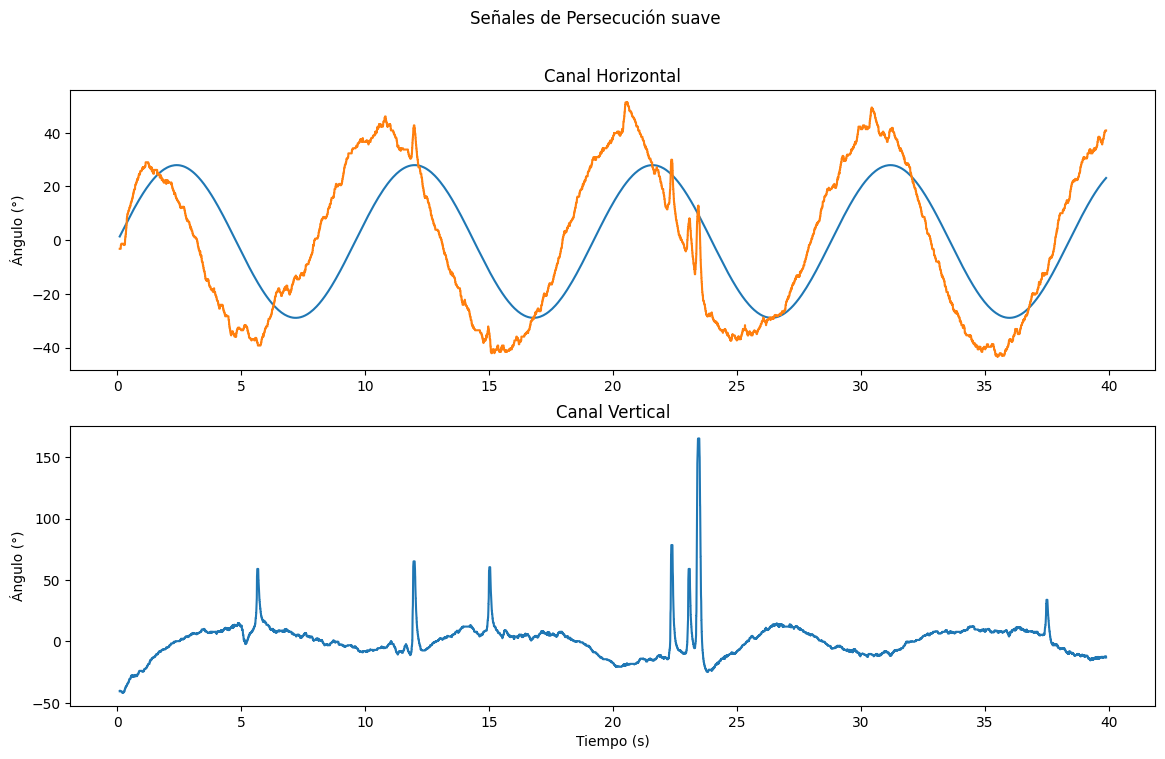

In [6]:
samples_to_remove = 100
samples = len(pursuit.hor_stimuli)
time = np.arange(samples) / 1000.0
time = time[samples_to_remove:-samples_to_remove]
print("Esta prueba tiene " + str(samples)  + " muestras")

horizontal = pursuit.hor_channel.copy()[samples_to_remove:-samples_to_remove] * -1
amplitude = horizontal.max() - horizontal.min()

stimuli = pursuit.hor_stimuli.copy()[samples_to_remove:-samples_to_remove]
stimuli -= stimuli.mean()
stimuli *= (amplitude * 2)

plt.suptitle("Señales de Persecución suave")

plt.subplot(211)
plt.title("Canal Horizontal")
plt.plot(time, stimuli)
plt.plot(time, horizontal)
plt.ylabel("Ángulo (°)")

plt.subplot(212)
plt.title("Canal Vertical")
plt.plot(time, pursuit.ver_channel[samples_to_remove:-samples_to_remove])
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")

plt.savefig("prueba.png")

## Ploteando la velocidad

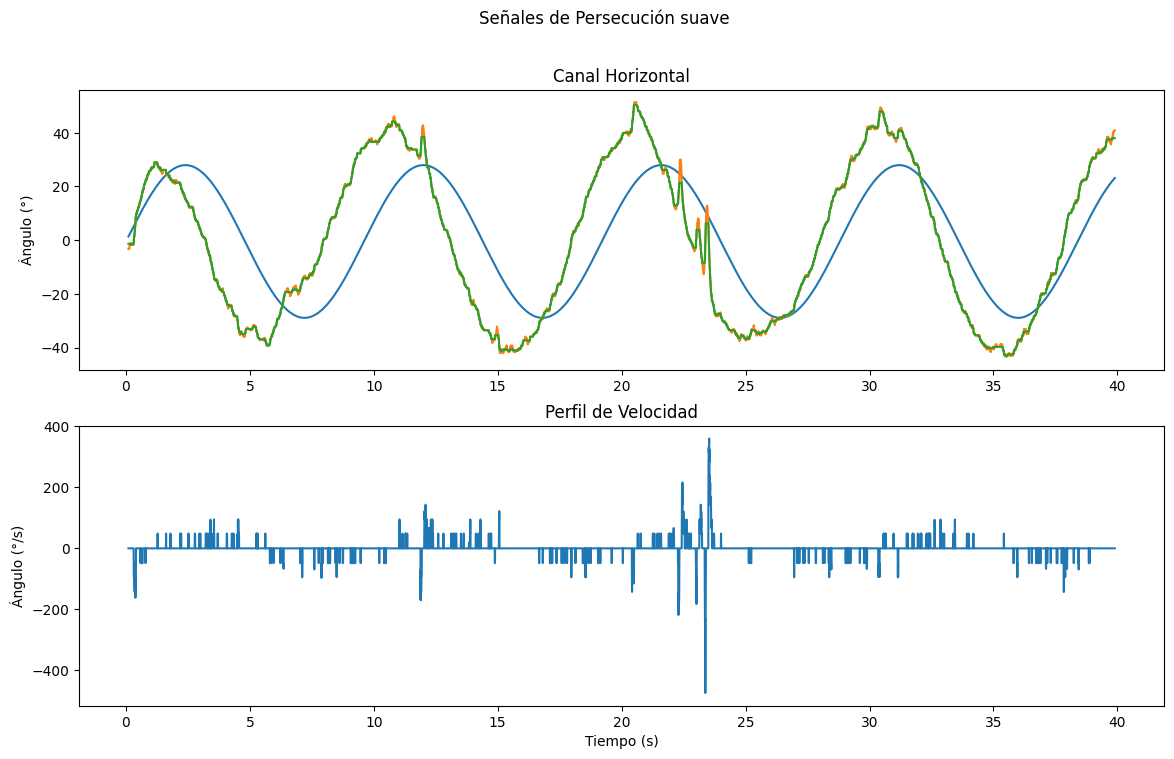

In [7]:
from bsp.core import differentiate, denoise
from scipy.signal import medfilt

horizontal_filtered = medfilt(horizontal, 201)
velocities = differentiate(horizontal_filtered)

plt.suptitle("Señales de Persecución suave")

plt.subplot(211)
plt.title("Canal Horizontal")
plt.plot(time, stimuli)
plt.plot(time, horizontal)
plt.plot(time, horizontal_filtered)
plt.ylabel("Ángulo (°)")

plt.subplot(212)
plt.title("Perfil de Velocidad")
plt.plot(time, medfilt(velocities, 21))
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°/s)")

plt.savefig("velocities.png")